In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("../DataSets/Breast_cancer_dataset.csv")
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])
features = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].values
target = df['diagnosis'].values.reshape(-1,1)
x_train = features[:400]
y_train = target[:400]
x_test = features[400:]
y_test = target[400:]

In [4]:
class Logistic_Regressor:
    def __init__(self, max_iter=1000, alpha=0.001):
        self.iter = max_iter
        self.alpha = alpha

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x_train, y_train):
        ones = np.ones((x_train.shape[0], 1))
        x_train = np.hstack((ones, x_train))
        
        y_train = y_train.reshape(-1, 1)
        
        self.w = np.zeros((x_train.shape[1], 1))
        
        for _ in range(self.iter):
            y_pred = self.sigmoid(x_train @ self.w)
            grad = x_train.T @ (y_train - y_pred)
            self.w += self.alpha * grad / len(y_train)

    def predict(self, x_test):
        ones = np.ones((x_test.shape[0], 1))
        x_test = np.hstack((ones, x_test))
        
        y_pred = self.sigmoid(x_test @ self.w)
        return (y_pred >= 0.5).astype(int)
    
    def getCoeff(self):
        return self.w


In [5]:
model = Logistic_Regressor(1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
pred_arr = []
for x,y in zip(y_pred,y_test):
    pred_arr.append(np.bitwise_xor(x,y))
mse = np.mean(pred_arr)
print("Mean squared error:\n", mse)
print("Confusion Matrix:\n", mat)
print("Learned Weights:\n", model.getCoeff())

Mean squared error:
 0.05325443786982249
Confusion Matrix:
 [[129   1]
 [  8  31]]
Learned Weights:
 [[-3.88918305e-02]
 [-2.94531981e-01]
 [-3.57561019e-01]
 [-1.71655775e+00]
 [-6.17471792e-01]
 [-2.70329354e-03]
 [ 1.33513159e-03]
 [ 4.86515589e-03]
 [ 2.25375134e-03]
 [-5.31352096e-03]
 [-2.14858354e-03]
 [-3.23971445e-04]
 [-2.33419337e-02]
 [ 1.65008279e-02]
 [ 8.37629714e-01]
 [-1.37314924e-04]
 [ 3.26779336e-04]
 [ 5.06688016e-04]
 [ 8.67078371e-05]
 [-4.67676582e-04]
 [-4.69618737e-05]
 [-3.11673572e-01]
 [-4.51801419e-01]
 [-1.74253550e+00]
 [ 8.53266051e-01]
 [-3.38078967e-03]
 [ 5.60349120e-03]
 [ 1.00295356e-02]
 [ 2.70219481e-03]
 [-7.12593705e-03]
 [-1.99181393e-03]]


<Axes: >

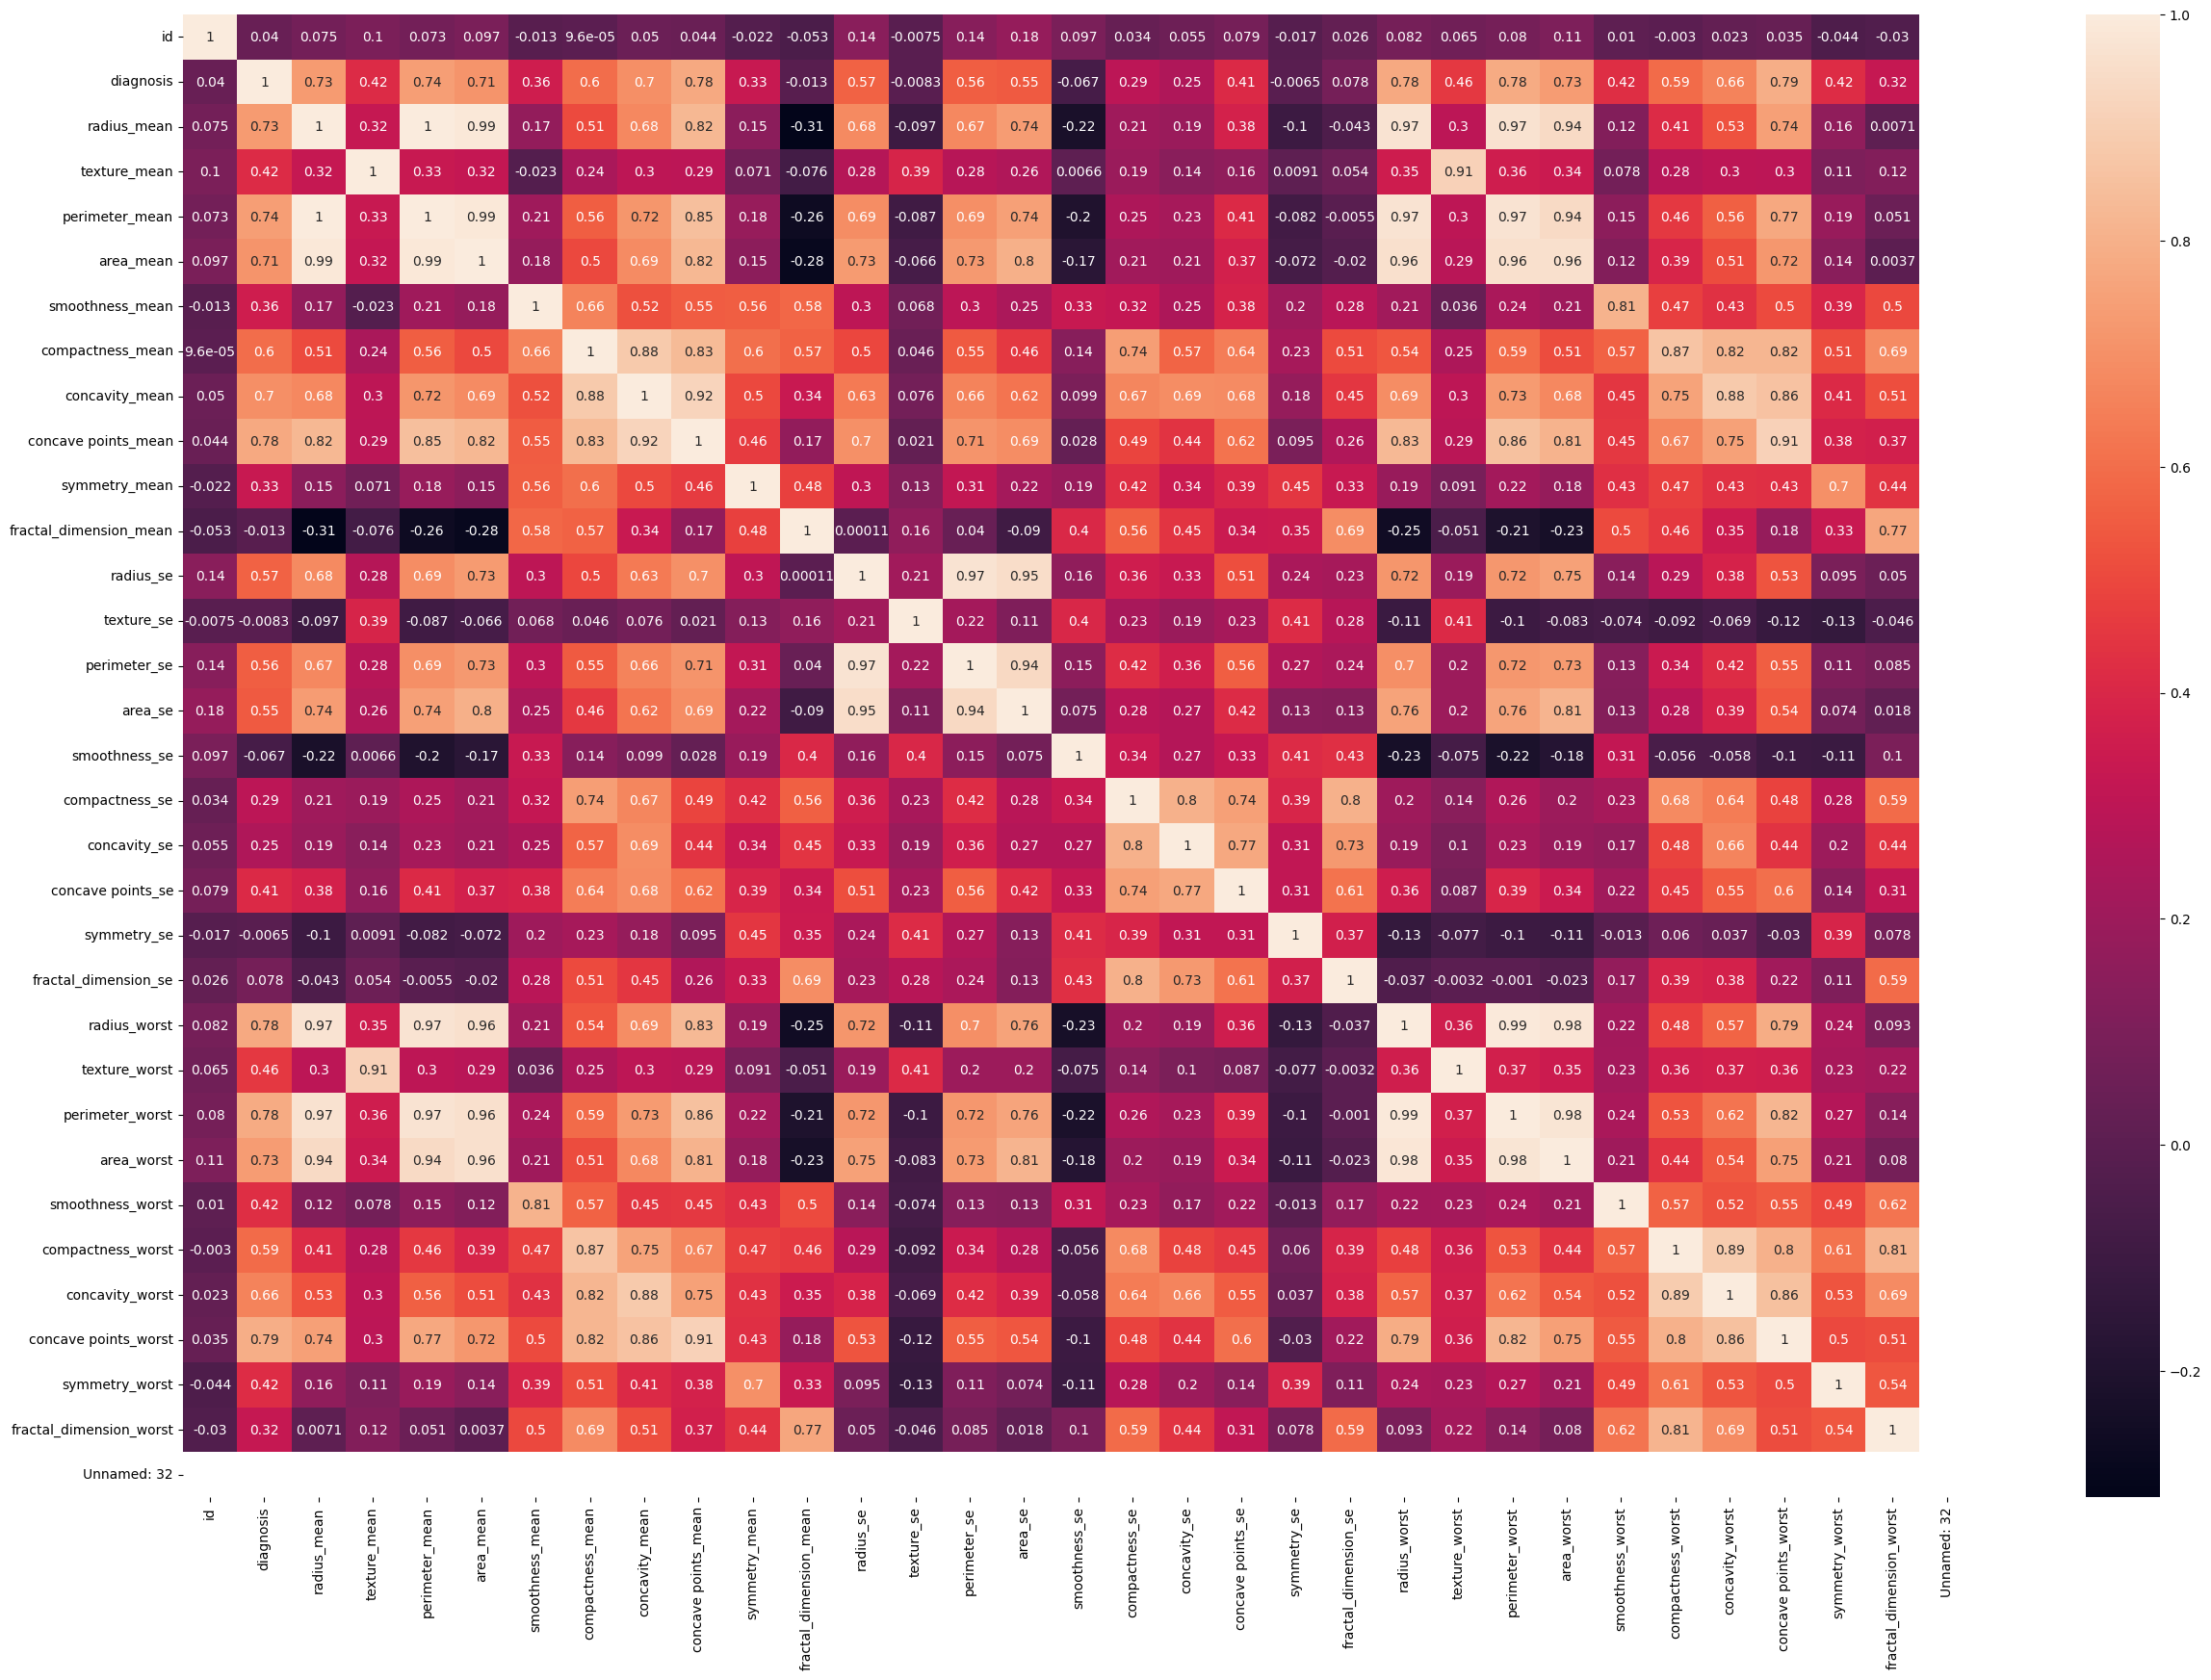

In [6]:
c=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(c,annot=True)